# Visualizing Intermediate Activation Function

## Introduction

Deep learning is extremely powerful and helping to lead the advancement of many AI tasks. That said, deep learning is often critized for having a lot of *black box* algorithms in that the components of the model itself are difficult to interpret. In the case of CNNs and image recognition, this is actually not true at all! In this lecture, we will explore how you can visualize the intermediate hidden layers within your CNN to uncover what sorts of features your deep network is uncovering through some of the various filters. With that, you'll gain interesting insights and knowledge as to how your CNN is *seeing* the world.  

## Objectives

You will be able to:

* Load a saved model
* Visualize the filters produced by hidden layers in a CNN

## Loading Our Previous Model

In [1]:
from keras.models import load_model

model = load_model('chest_xray_all_data.h5')
model.summary()  # As a reminder.

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Loading an Image from the Training Set

In [4]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 150, 150, 3)


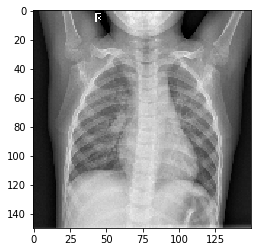

In [5]:
img_path = 'IM-0115-0001.jpeg'

# We preprocess the image into a 4D tensor


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)


plt.imshow(img_tensor[0])
plt.show()

## Visualizing a Layer

In order to get a better sense of what representations our CNN is learning under the hood, we will visualize the feature maps generated during training. Recall from our previous discussions that CNNs work by applying a filter successively over an image. This transformation creates a new representation of the image which we call a feature map. 


<img src="filter_feature_map.png" width=550>

In [6]:
from keras import models

In [12]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

(1, 148, 148, 32)


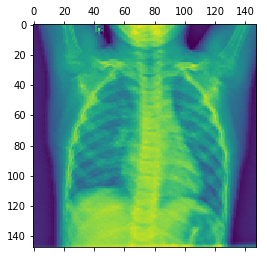

In [14]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

(1, 148, 148, 32)


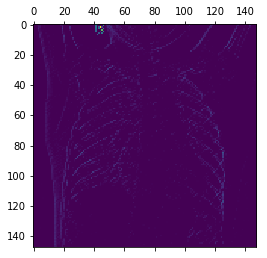

In [18]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

The result shown above is the first channel of the first layer. It has taken our original image and returned a new version with 148x148 pixels with 32 channels. Here we visualized channel 30.  

More extensively, we could also visualize all 32 of these channels from the first activation function.

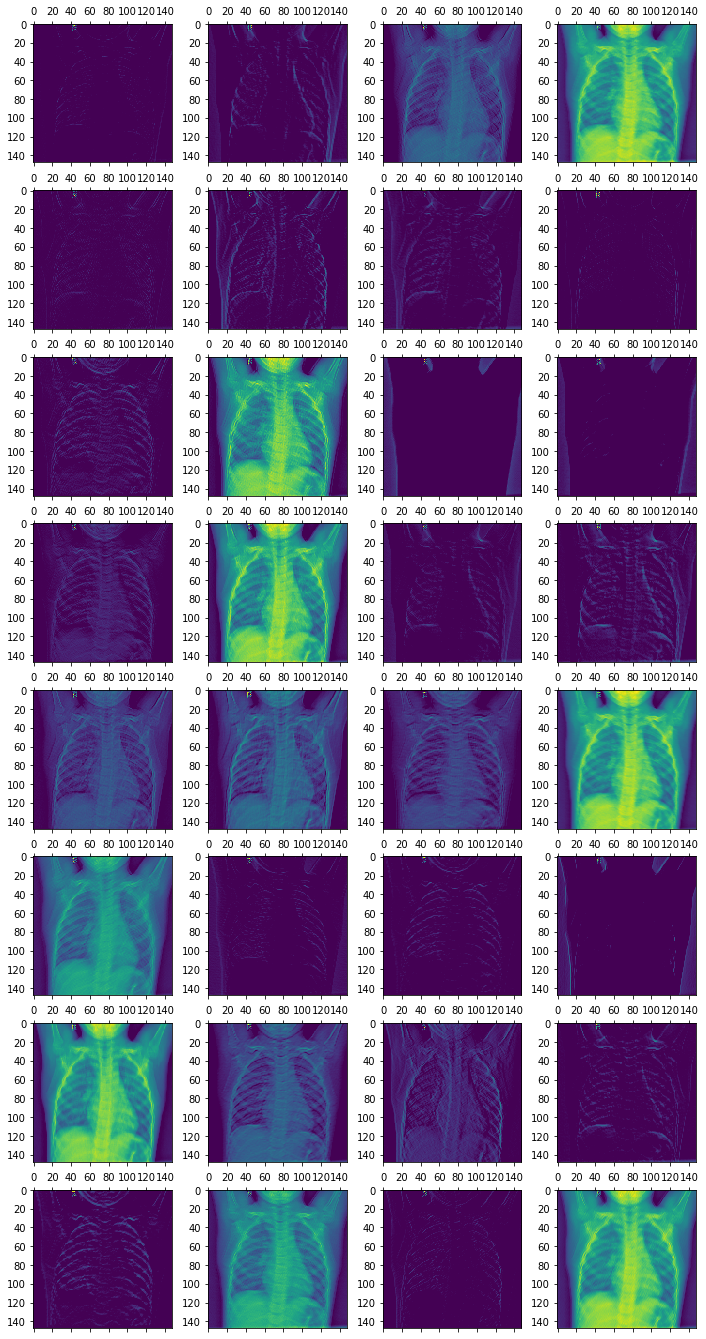

In [22]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

## Repeating for All Layers

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:716: UserWarning: Warning: convert

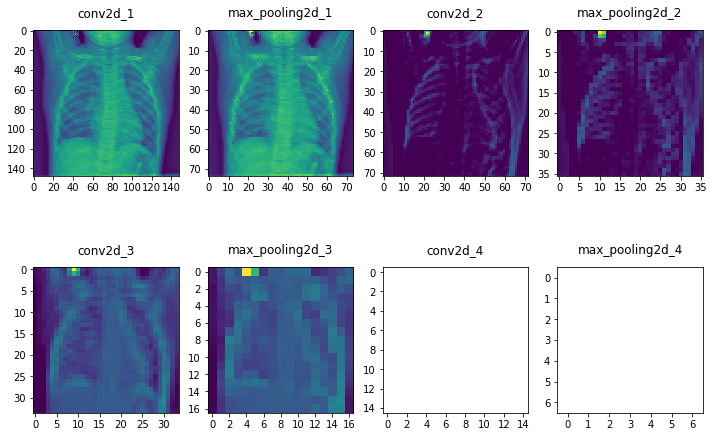

In [51]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 29], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

Note how the later layers are more abstract representations, and in the case of the final two layers, we see nothing at all. This demonstrates how the representations learned by CNN architectures become increasingly abstract with the depth of the layers. In the case of the blank images displayed, this indicates that the patterns were not present in the current image. In other words, the CNN learned various patterns through training, but these more abstract features such as a rib or a lung were not found in this particular instance.

## Summary

In this lesson, we investigated how you can visualize feature maps, the representations learned by CNNs during training. While outside the scope of this lesson, there are other visualization techniques for CNNs such as visualizing the filters themselves, or visualizing heatmaps of the original image to identify where in an image patterns were identified. In the upcoming lab, you'll continue to practice visualizing feature maps, as we did here creating a complete visualization of all channels within each of the 8 model layers.